In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import tensornetwork as tn
from typing import Tuple, List, Optional

def random_initializer(d_phys: int, d_bond: int, std: float = 1e-3,
                       boundary: bool = False) -> np.ndarray:
  """Initializes MPS tensors randomly and close to identity matrices.
  Args:
    d_phys: Physical dimension of MPS.
    d_bond: Bond dimension of MPS.
    std: STD of normal distribution for random initialization.
    boundary: If True returns a tensor of shape (d_phys, d_bond).
      Otherwise returns a tensor of shape (d_phys, d_bond, d_bond).
    Note that d_phys given in this function does not have to be the actual
    MPS physical dimension (eg. it can also be n_labels to initialize there
    label MPS tensor).
  Returns:
    tensor: Random numpy array with shape described above.
  """
  if boundary:
    x = np.zeros((d_phys, d_bond))
    x[:, 0] = 1
  else:
    x = np.array(d_phys * [np.eye(d_bond)])
  x += np.random.normal(0.0, std, size=x.shape)
  return x


In [6]:
random_initializer(3,2)

array([[[ 1.00194252e+00, -2.29174170e-04],
        [-1.97955650e-03,  9.98209371e-01]],

       [[ 1.00068629e+00, -1.56972446e-04],
        [ 1.13111481e-03,  1.00039972e+00]],

       [[ 1.00067762e+00, -1.03871174e-03],
        [-2.96572526e-04,  9.99978796e-01]]])

In [9]:
tn.TensorNetwork

AttributeError: module 'tensornetwork' has no attribute 'TensorNetwork'

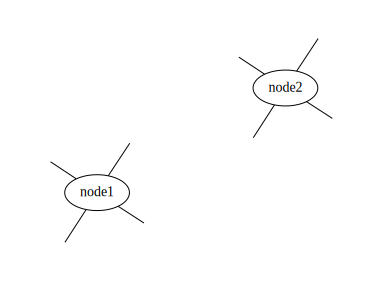

In [14]:
U = np.array(np.ones([4,4]))
T_U = np.reshape(U,[2,2,2,2],order='A')
node1 = tn.Node(T_U, name="node1")
node2 = tn.Node(T_U, name="node2")

tn.to_graphviz([node1, node2])

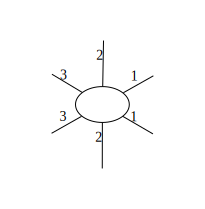

In [16]:
node1[0]^node2[0]
result = node1 @ node2

tn.to_graphviz([result])